In [1]:
import pynucastro as pyna

In [2]:
nuclei = ["n", "h1", "he4", "b11", "c12", "n13", "n14",
          "o16", "o17", "ne20", "ne22", "na23",
          "mg24", "mg25", "mg26", "al27", "si28", "si29",
          "si30", "p30", "p31", "s31", "s32", "cl35",
          "ar36", "ar37", "ar38", "ar39", "k39",
          "ca40", "sc43", "ti44", "v47", "cr48", "mn51",
          "fe52", "fe56", "co55", "ni56", "ni58", "ni59"]

In [3]:
len(nuclei)

41

In [4]:
rl = pyna.ReacLibLibrary()

In [5]:
lib1 = rl.linking_nuclei(nuclei)

In [6]:
len(lib1.get_rates())

186

In [7]:
tl = pyna.TabularLibrary(ordering=["ffn", "langanke"])

In [8]:
lib2 = tl.linking_nuclei(nuclei)

In [9]:
len(lib2.get_rates())

8

In [10]:
rates_to_derive = lib1.backward().get_rates()

# now for each of those derived rates, look to see if the pair exists

for r in rates_to_derive:
    fr = lib1.get_rate_by_nuclei(r.products, r.reactants)
    if fr:
        print(f"modifying {r} from {fr}")
        lib1.remove_rate(r)
        d = pyna.DerivedRate(rate=fr, compute_Q=True, use_pf=True)
        lib1.add_rate(d)

modifying C12 ⟶ p + B11 from B11 + p ⟶ C12 + 𝛾
modifying N13 ⟶ p + C12 from C12 + p ⟶ N13 + 𝛾
modifying N14 ⟶ n + N13 from N13 + n ⟶ N14 + 𝛾
modifying O16 ⟶ He4 + C12 from C12 + He4 ⟶ O16 + 𝛾
modifying O17 ⟶ n + O16 from O16 + n ⟶ O17 + 𝛾
modifying Ne20 ⟶ He4 + O16 from O16 + He4 ⟶ Ne20 + 𝛾
modifying Na23 ⟶ p + Ne22 from Ne22 + p ⟶ Na23 + 𝛾
modifying Mg24 ⟶ p + Na23 from Na23 + p ⟶ Mg24 + 𝛾
modifying Mg24 ⟶ He4 + Ne20 from Ne20 + He4 ⟶ Mg24 + 𝛾
modifying Mg25 ⟶ n + Mg24 from Mg24 + n ⟶ Mg25 + 𝛾
modifying Mg26 ⟶ n + Mg25 from Mg25 + n ⟶ Mg26 + 𝛾
modifying Mg26 ⟶ He4 + Ne22 from Ne22 + He4 ⟶ Mg26 + 𝛾
modifying Al27 ⟶ p + Mg26 from Mg26 + p ⟶ Al27 + 𝛾
modifying Al27 ⟶ He4 + Na23 from Na23 + He4 ⟶ Al27 + 𝛾
modifying Si28 ⟶ p + Al27 from Al27 + p ⟶ Si28 + 𝛾
modifying Si28 ⟶ He4 + Mg24 from Mg24 + He4 ⟶ Si28 + 𝛾
modifying Si29 ⟶ n + Si28 from Si28 + n ⟶ Si29 + 𝛾
modifying Si29 ⟶ He4 + Mg25 from Mg25 + He4 ⟶ Si29 + 𝛾
modifying Si30 ⟶ n + Si29 from Si29 + n ⟶ Si30 + 𝛾
modifying Si30 ⟶ He4 + Mg

In [11]:
all_lib = lib1 + lib2

In [12]:
dupes = all_lib.find_duplicate_links()
dupes

[[n ⟶ p + e⁻ + 𝜈, n ⟶ p + e⁻ + 𝜈],
 [P30 ⟶ Si30 + e⁺ + 𝜈, P30 + e⁻ ⟶ Si30 + 𝜈],
 [S31 ⟶ P31 + e⁺ + 𝜈, S31 + e⁻ ⟶ P31 + 𝜈],
 [Ar39 ⟶ K39 + e⁻ + 𝜈, Ar39 ⟶ K39 + e⁻ + 𝜈]]

In [13]:
rates_to_remove = []
for d in dupes:
    for r in d:
        if isinstance(r, pyna.rates.ReacLibRate):
            rates_to_remove.append(r)

for r in rates_to_remove:
    all_lib.remove_rate(r)

In [14]:
len(all_lib.get_rates())

190

In [15]:
net = pyna.AmrexAstroCxxNetwork(libraries=[all_lib])

In [16]:
net.make_ap_pg_approx(intermediate_nuclei=["sc43", "v47", "mn51"])
net.remove_nuclei(["sc43", "v47", "mn51"])

using approximate rate Ca40 + He4 ⟶ Ti44 + 𝛾
using approximate rate Ti44 ⟶ Ca40 + He4
using approximate rate Ti44 + He4 ⟶ Cr48 + 𝛾
using approximate rate Cr48 ⟶ Ti44 + He4
using approximate rate Cr48 + He4 ⟶ Fe52 + 𝛾
using approximate rate Fe52 ⟶ Cr48 + He4
removing rate Ca40 + He4 ⟶ Ti44 + 𝛾
removing rate Ca40 + He4 ⟶ p + Sc43
removing rate Sc43 + p ⟶ Ti44 + 𝛾
removing rate Ti44 ⟶ He4 + Ca40
removing rate Ti44 ⟶ p + Sc43
removing rate Sc43 + p ⟶ He4 + Ca40
removing rate Ti44 + He4 ⟶ Cr48 + 𝛾
removing rate Ti44 + He4 ⟶ p + V47
removing rate V47 + p ⟶ Cr48 + 𝛾
removing rate Cr48 ⟶ He4 + Ti44
removing rate Cr48 ⟶ p + V47
removing rate V47 + p ⟶ He4 + Ti44
removing rate Cr48 + He4 ⟶ Fe52 + 𝛾
removing rate Cr48 + He4 ⟶ p + Mn51
removing rate Mn51 + p ⟶ Fe52 + 𝛾
removing rate Fe52 ⟶ He4 + Cr48
removing rate Fe52 ⟶ p + Mn51
removing rate Mn51 + p ⟶ He4 + Cr48
looking to remove K39 + He4 ⟶ Sc43 + 𝛾
looking to remove Sc43 + He4 ⟶ V47 + 𝛾
looking to remove Sc43 ⟶ He4 + K39
looking to remove V47

In [17]:
net.make_nse_protons(48)

modifying p_Co55__Ni56 to use NSE protons
modifying Ni56__p_Co55__derived to use NSE protons
modifying He4_Fe52__p_Co55 to use NSE protons
modifying p_Co55__He4_Fe52__derived to use NSE protons
modifying He4_Co55__p_Ni58 to use NSE protons
modifying p_Ni58__He4_Co55__derived to use NSE protons


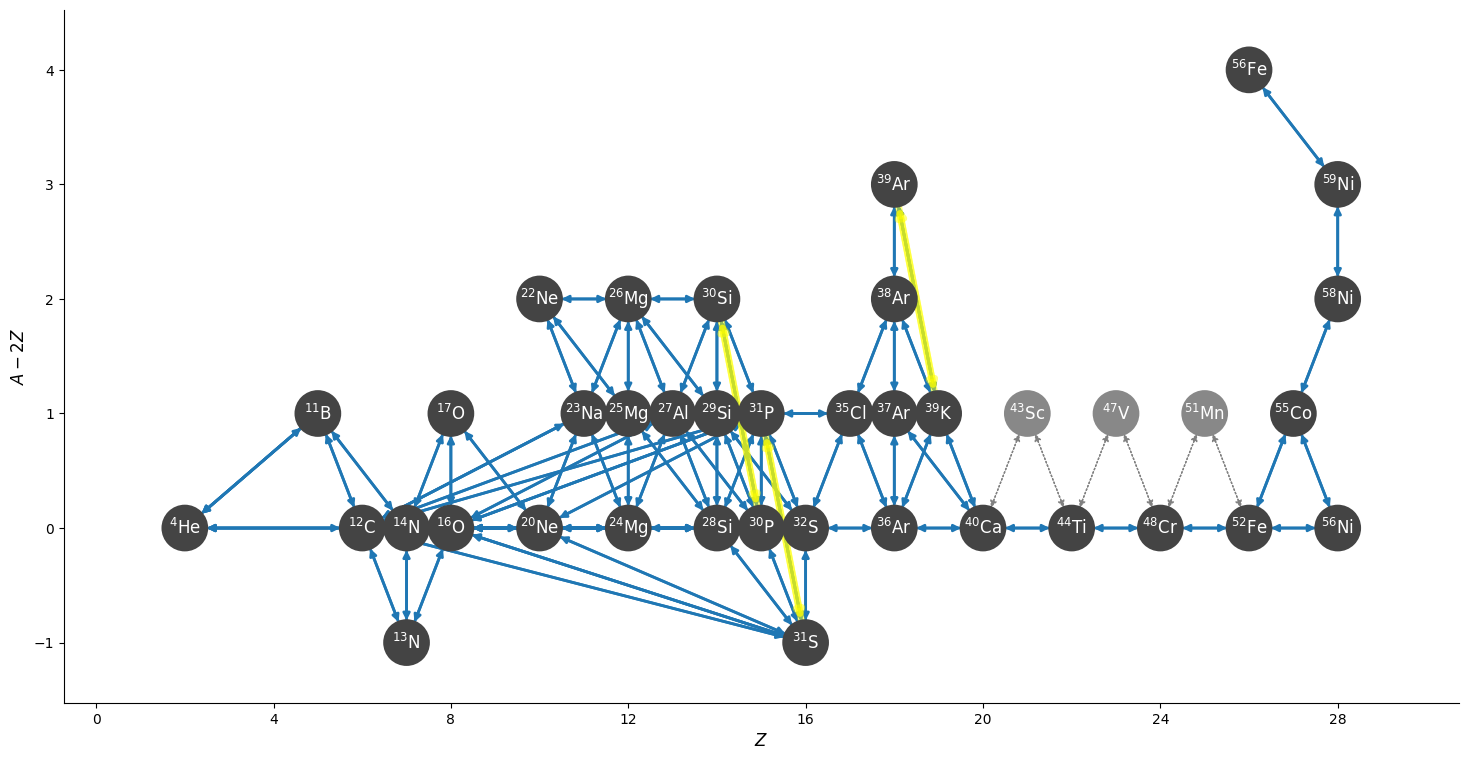

In [18]:
fig = net.plot(rotated=True, hide_xp=True, hide_xalpha=True,
               size=(1800, 900), highlight_filter_function=lambda r: isinstance(r, pyna.rates.TabularRate))

In [19]:
net.write_network()

/home/zingale/development/pynucastro/pynucastro/rates/derived_rate.py:91: UserWarning: C12 partition function is not supported by tables: set pf = 1.0 by default
  warnings.warn(UserWarning(f'{nuc} partition function is not supported by tables: set pf = 1.0 by default'))
/home/zingale/development/pynucastro/pynucastro/rates/derived_rate.py:91: UserWarning: B11 partition function is not supported by tables: set pf = 1.0 by default
  warnings.warn(UserWarning(f'{nuc} partition function is not supported by tables: set pf = 1.0 by default'))
/home/zingale/development/pynucastro/pynucastro/rates/derived_rate.py:91: UserWarning: N13 partition function is not supported by tables: set pf = 1.0 by default
  warnings.warn(UserWarning(f'{nuc} partition function is not supported by tables: set pf = 1.0 by default'))
/home/zingale/development/pynucastro/pynucastro/rates/derived_rate.py:91: UserWarning: N14 partition function is not supported by tables: set pf = 1.0 by default
  warnings.warn(UserWa

In [20]:
len(net.unique_nuclei)

39

In [21]:
len(net.get_rates())

170